<a href="https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/colaboratory_file_di_partenza.ipynb)

In [1]:
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/prepare_vm.py
#!pip install --upgrade numpy
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
import pandas as pd

from prepare_vm import *

--2019-10-06 05:25:51--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7663 (7.5K) [text/plain]
Saving to: ‘marradi.py’

marradi.py          100%[===================>]   7.48K  --.-KB/s    in 0s      

2019-10-06 05:25:52 (110 MB/s) - ‘marradi.py’ saved [7663/7663]

--2019-10-06 05:25:54--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4317 (4.2K) [text/plai

In [0]:
##### SOLO SU COLABORATORY E PER LAVORARE CON GOOGLE SPREADSHEET #####
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
#scarico i dati di valutazione del questionario
questionario = download_gspread("Libro Codice Paola", sheet_name='Paola', gc = gc)

questionario.head(3)


In [0]:
#questa funzione ci da un overview di tutte le variabili del questionario per una successiva analisi
pandas_profiling.ProfileReport(questionario)

In [9]:
help(download_gspread)

Help on function download_gspread in module tools:

download_gspread(file_name, sheet_name='Foglio1', key=False, format='wide', virgola_italiano=False, gc=None)
    questa funzione, dato il nome del file di google spreadsheet
    e dello specifico foglio di calcolo (opzionale) di google
    restituisce un dataframe di pandas
    file_name: str 
    sheet_name: str
    key: boolean
    format: ["wide", "long", None]



In [10]:
help(dist_frequenza)

Help on function dist_frequenza in module marradi:

dist_frequenza(matrice, colonna, save=False, tipo='categoriale', lista_ordinale=False)
    matrice: passare un dataframe di pandas
    colonna: indicare la colonna su cui effettuare la distribuzione di frequenza
    save: [False oppure nome del file] scegli se salvare o meno la tabella in excel
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    lista_ordinale: una lista di valori attraverso il cui ordinare il risultato del tipo ordinale



In [11]:
dist_frequenza(questionario, "1_genere")

,Frequenze,Percentuale
1.0,30.0,52.63
2.0,27.0,47.37
Totale,57.0,100.00


In [12]:
help(plot_dist_frequenza)

Help on function plot_dist_frequenza in module marradi:

plot_dist_frequenza(distribuzione, tipo='categoriale', Y='Percentuale', x_label='Valori', y_label='Percentuale', figsize=(12, 8), missing=None)
    distribuzione: inserire risultato della funzione dist_frequenza
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    x_label: etichetta asse x
    y_label: etichetta_asse y



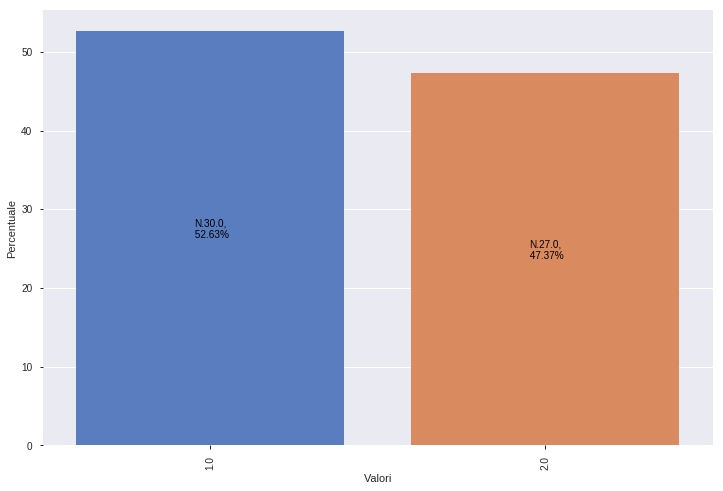

In [16]:
plot_dist_frequenza(dist_frequenza(questionario, "1_genere"))

In [17]:
help(tabella_di_contingenza)

Help on function tabella_di_contingenza in module marradi:

tabella_di_contingenza(dataframe, colonna_A, colonna_B, ordine_A=False, ordine_B=False, informativo=False, norm_axis=False)
    dataframe: inserire la tabella su cui si vuole fare la tabulazione incrociata
    colonna_A: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    colonna_B: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
    ordine_A: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna A
    ordine_B: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna B
    iformativo: True, permette di avere in una stessa tabella frequenze, frequenze attese e scarti.



In [18]:
tabella_di_contingenza(questionario, "1_genere", "3_statoCivile")

3_statoCivile,1.0,2.0,3.0,All
1_genere,,,,
1.0,28,1,1,30
2.0,27,0,0,27
All,55,1,1,57
